<a href="https://colab.research.google.com/github/WilliamHallPortfolio/Customer-Churn-Prediction/blob/main/Telecom%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn Prediction

The goal of this project is to examine the sources of customer churn at a fictional telecom company <br> and segment the customers that are more likely to find services elsewhere.

The source of the data comes from Kaggle <br>
https://www.kaggle.com/code/praxitelisk/telco-customer-churn-eda-ml/data

Provided below is a definition of each attribute from the data source:

- customerID =
Customer ID

- gender =
Whether the customer is a male or a female

- SeniorCitizen =
Whether the customer is a senior citizen or not (1, 0)

- Partner =
Whether the customer has a partner or not (Yes, No)

- Dependents =
Whether the customer has dependents or not (Yes, No)

- tenure =
Number of months the customer has stayed with the company

- PhoneService =
Whether the customer has a phone service or not (Yes, No)

- MultipleLines =
Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService =
Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity =
Whether the customer has online security or not (Yes, No, No internet service)

## 1 Data Preparation

### Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
!git clone https://github.com/WilliamHallPortfolio/Customer-Churn-Prediction.git

Cloning into 'Customer-Churn-Prediction'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 49 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 1.58 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
df = pd.read_csv('/content/Customer-Churn-Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial Exploration of Data

In [4]:
# Checking attribute names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Checking the rows, columns, and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Preprocessing

In [7]:
# Converting null entries into 0
# Changing TotalCharges from object to numerical
df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [8]:
# Converting SeniorCitizen to object
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df["SeniorCitizen"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


## 3. Checking for Null Entries and Outliers

In [9]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

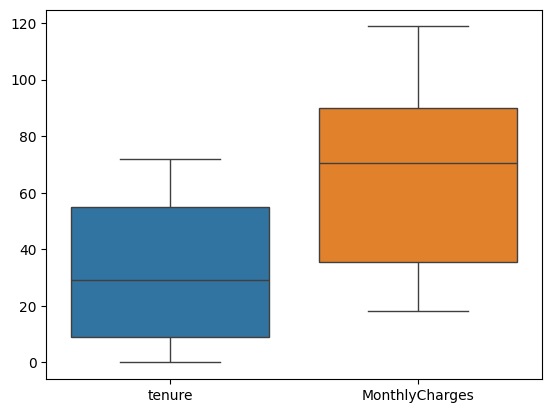

In [10]:
# Checking for outliers
sns.boxplot(data=df[['tenure','MonthlyCharges']])

<Axes: ylabel='TotalCharges'>

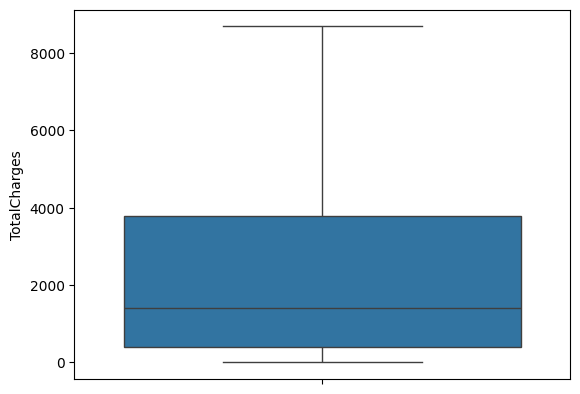

In [11]:
sns.boxplot(data=df['TotalCharges'])

## 4. EDA

When examining the statistical details of the data below, we see the average customer <br>
remains with the company for 32 months with a maximum of 72 months.<br>
We also see the average monthly bill is roughly 65 dollars with a maximum bill of 118.75 dollars.<br>
Lastly, we can observe the average total charges is roughly 2280 dollars with a maximum total bill of 8685 dollars.

In [12]:
# Examining statistical details of numerical attributes
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Examining Target Variable "Churn"

Upon examining the target variable "Churn", we notice that <br>
an alarming 27% of customers leave Telco company for reasons <br>
we will explore in this project.

<Axes: ylabel='count'>

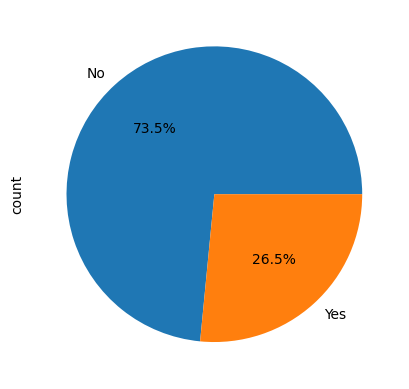

In [13]:
df['Churn'].value_counts().plot(kind="pie",autopct='%1.1f%%')

### Examining Distribution and Churn in Numerical Features

From examining the charts below, we can check the distribution and see how each variable affects churn.


**Tenure:**

<Axes: xlabel='tenure', ylabel='Count'>

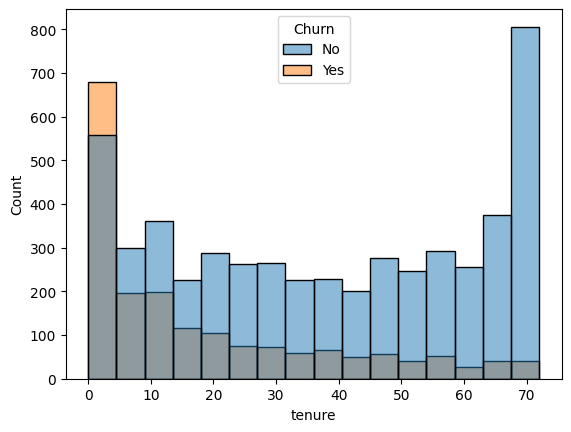

In [14]:
sns.histplot(data=df,x='tenure',hue='Churn')

**Monthly Charges:**

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

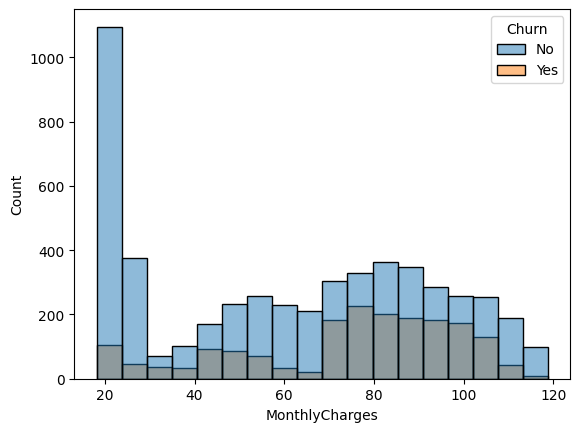

In [15]:
sns.histplot(data=df,x='MonthlyCharges',hue='Churn')

**Total Charges:**

<Axes: xlabel='TotalCharges', ylabel='Count'>

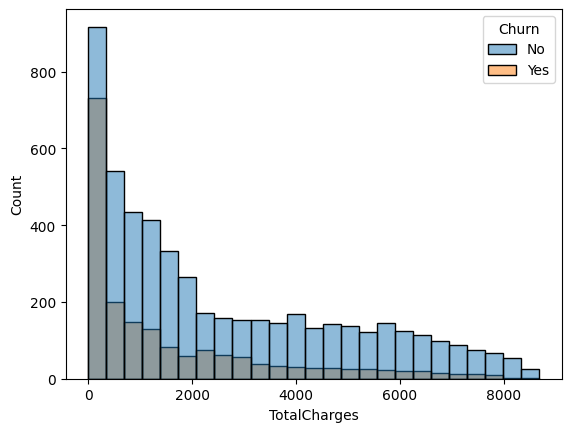

In [16]:
sns.histplot(data=df,x='TotalCharges',hue='Churn')

### Examining Churn in Categorical Features

In [17]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

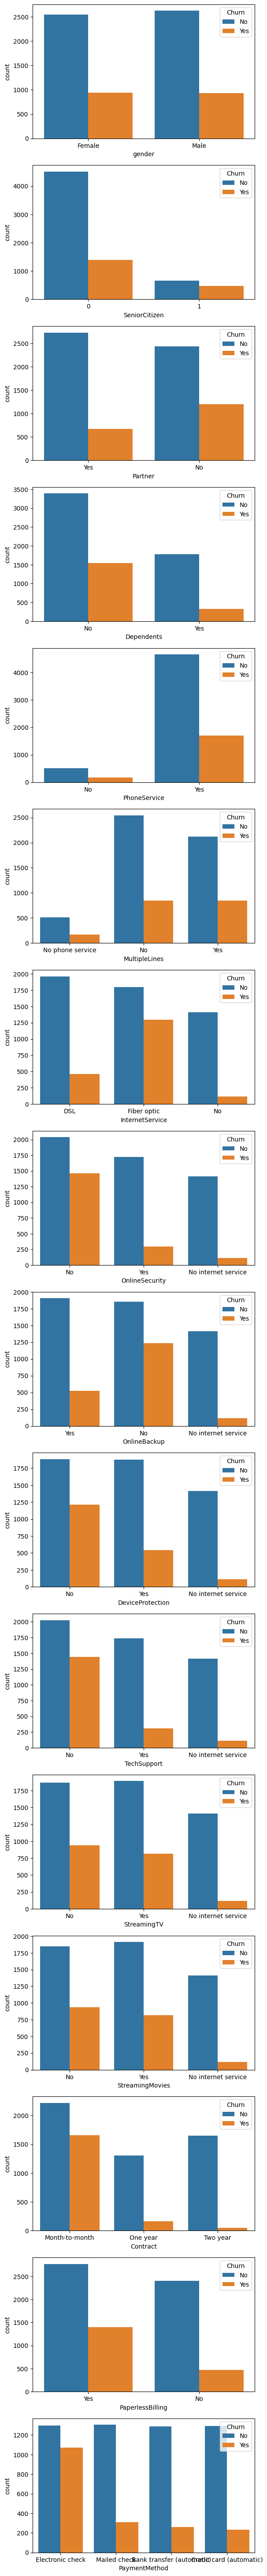

In [18]:
fig, ax = plt.subplots(len(categorical_variables), figsize=(6.5, 75))

for cat, i in zip(categorical_variables, range(len(categorical_variables))):
    countplot = sns.countplot(data=df, x=df[cat],hue='Churn',ax=ax[i])
    plt.setp(countplot.get_xticklabels(), rotation=0)

### Takeaways from Categorical Plots:

- **gender:** Churn rates are identical regardless of gender.
- **SeniorCitizen:** According to the plot, seniors are likelier to churn than non-seniors.
- **Partner:** Singe customers are more likely to churn than partnered subscribers.
- **Dependents:** Churn rates are higher for subscribers without children.
- **PhoneService:** Churn rates are much higher for subscribers that include phone services into their plan.
- **MultipleLines:** Subscribers with multiple lines and those that do not have equal churn rates.
- **InternetService:** Surprisingly, internet subscribers with Fiber Optic service are likely to leave our company.
- **OnlineSecurity:** Churn rates are much higher for internet customers without online security.
- **OnlineBackup/DeviceProtection/TechSupport:** <br>
    Churn rates are also much higher for internet customers without online backup, device protection, technical support services. <br>    
- **StreamingTV/StreamingMovies:** <br>
    Customers who do not use streaming services are more likely to churn a little more than other members who choose our streaming options.
- **PaperlessBilling:** Paperless billing customers have higher churn rates.
- **PaymentMethod:** Electronic checking customers also have higher churn rates.

## Further Preprocessing for ML Preparation

#### Scaling Numerical Variables

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
scaled_df

array([[0.01388889, 0.11542289, 0.00343704],
       [0.47222222, 0.38507463, 0.21756402],
       [0.02777778, 0.35422886, 0.01245279],
       ...,
       [0.15277778, 0.11293532, 0.03989153],
       [0.05555556, 0.55870647, 0.03530306],
       [0.91666667, 0.86965174, 0.78810105]])

Checking summary statistics of scaled variables

In [20]:
scaled_df = pd.DataFrame(scaled_df,columns = ['tenure','MonthlyCharges','TotalCharges'] )
scaled_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


Checking distribution of scaled variable

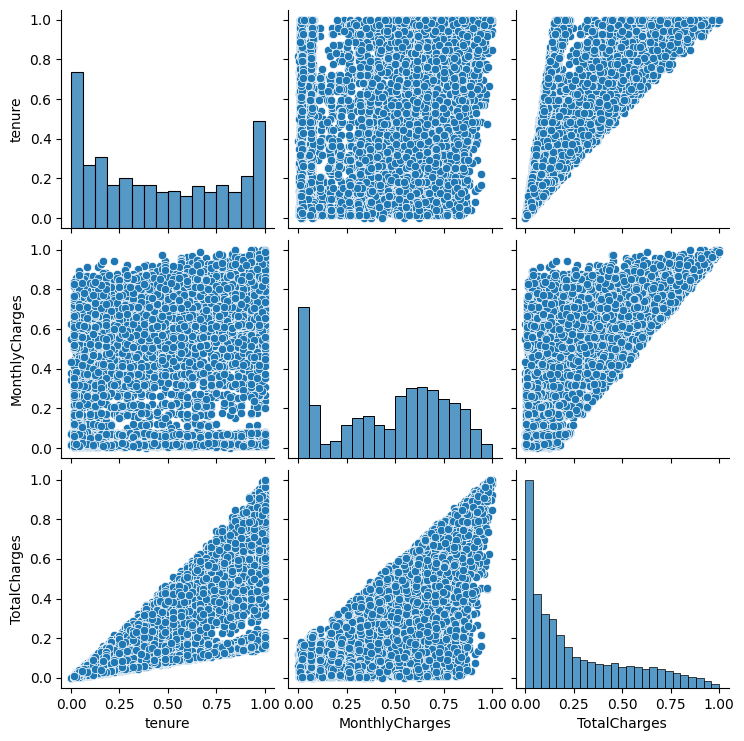

In [21]:
sns.pairplot(scaled_df)

In [22]:
df['tenure'] = scaled_df['tenure']
df['MonthlyCharges'] = scaled_df['MonthlyCharges']
df['TotalCharges'] = scaled_df['TotalCharges']

One-Hot encoding X and y

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
X = df.drop(['Churn','customerID'],axis=1)

encoder = OneHotEncoder(drop='first', sparse_output=False)

X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))

# Combining encoded columns with the rest of the DataFrame
X = pd.concat([X.drop(columns=X.select_dtypes(include=['object']).columns), X_encoded_df], axis=1)

In [25]:
y = df['Churn']
y = encoder.fit_transform(y.values.reshape(-1,1))

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ML Models Used

Replacing original numerical variables with scaled variables

- **Logistic Regression**
- **Random Forest**
- **Gradient Boosting Model (XGBoost)**

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [29]:
lr_pred = logmodel.predict(X_test)

In [30]:
print('confusion_matrix :')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print('classification_report :')
print(classification_report(y_test,lr_pred))
print('\n')
print('accuracy_score :')
print(accuracy_score(y_test,lr_pred))

confusion_matrix :
[[1391  148]
 [ 248  326]]


classification_report :
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1539
         1.0       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



accuracy_score :
0.812588736393753


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

Finding the optimal number of estimators

In [51]:
n_estimators_range = range(50, 300, 50)
scores = []

for n in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

best_n_estimators = n_estimators_range[np.argmax(scores)]
print(f"Best number of estimators: {best_n_estimators}")

Best number of estimators: 150


In [52]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [53]:
rfc_pred = rfc.predict(X_test)

In [54]:
print('confusion_matrix :')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print('classification_report :')
print(classification_report(y_test,rfc_pred))
print('\n')
print('accuracy_score :')
print(accuracy_score(y_test,rfc_pred))

confusion_matrix :
[[1417  122]
 [ 302  272]]


classification_report :
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1539
         1.0       0.69      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



accuracy_score :
0.7993374349266446


### Finding Most Importand Features

In [35]:
importance = rfc.feature_importances_
col_names = X_train.columns

In [36]:
f_importance = pd.DataFrame({'Feature': col_names, 'Importance': importance})
f_importance = f_importance.sort_values(by='Importance', ascending=False)
print(f_importance)

                                  Feature  Importance
2                            TotalCharges    0.193407
0                                  tenure    0.171805
1                          MonthlyCharges    0.168365
28         PaymentMethod_Electronic check    0.036305
10            InternetService_Fiber optic    0.035642
25                      Contract_Two year    0.033060
3                             gender_Male    0.028415
13                     OnlineSecurity_Yes    0.026739
26                   PaperlessBilling_Yes    0.026124
5                             Partner_Yes    0.024542
19                        TechSupport_Yes    0.022710
15                       OnlineBackup_Yes    0.022518
9                       MultipleLines_Yes    0.021036
4                         SeniorCitizen_1    0.020468
24                      Contract_One year    0.020271
6                          Dependents_Yes    0.019976
17                   DeviceProtection_Yes    0.019739
23                    Stream

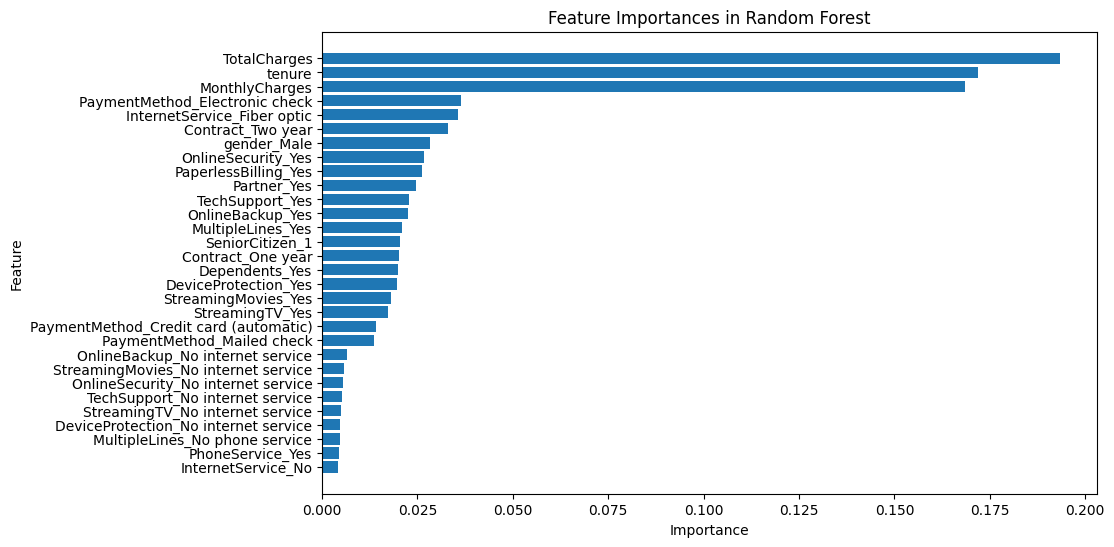

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(f_importance['Feature'], f_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Using K-Means to Segment Customer's Risk Level

In [38]:
from sklearn.cluster import KMeans

Using Elbow method to find the best K parameter

In [39]:
distortions =[]
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

Text(0.5, 1.0, 'Finding Optimal K with Elbow Method')

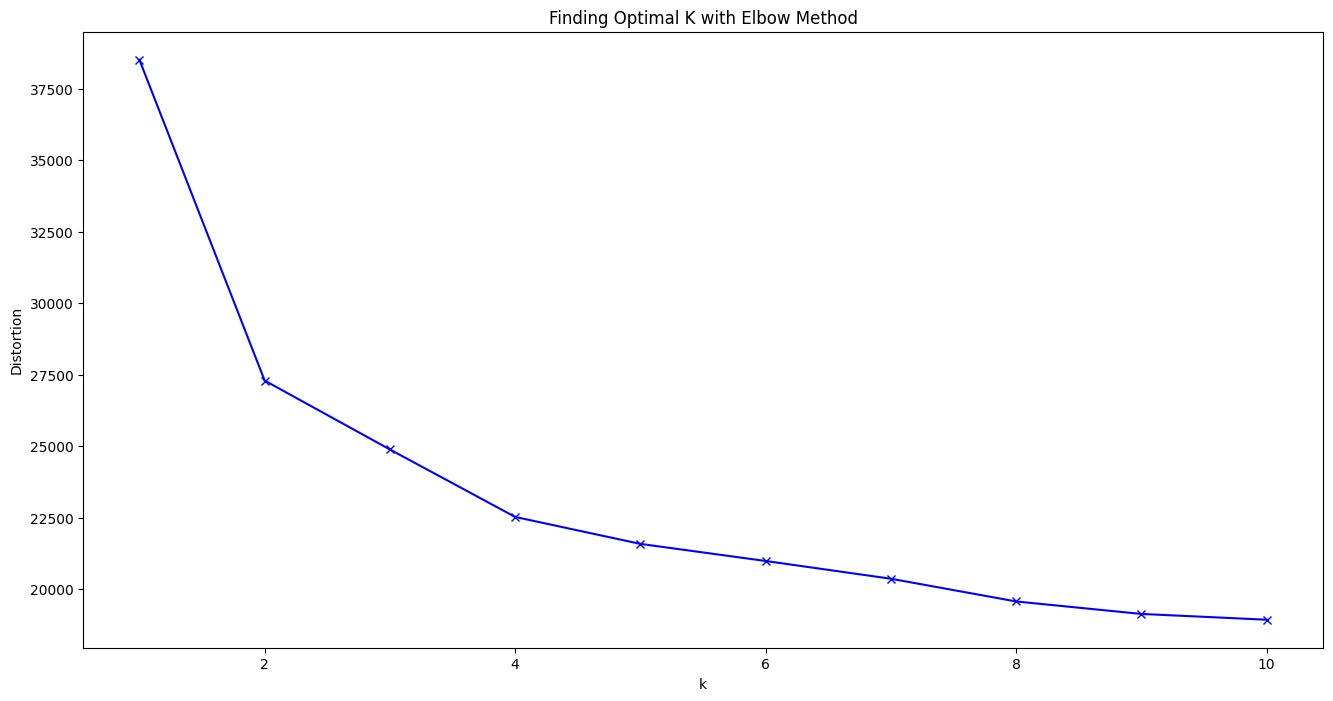

In [40]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding Optimal K with Elbow Method')

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [42]:
X['k_means'] = kmeans.predict(X)
X['customerID'] = df['customerID']
X['Churn'] = y

Population of each group

<Axes: xlabel='k_means'>

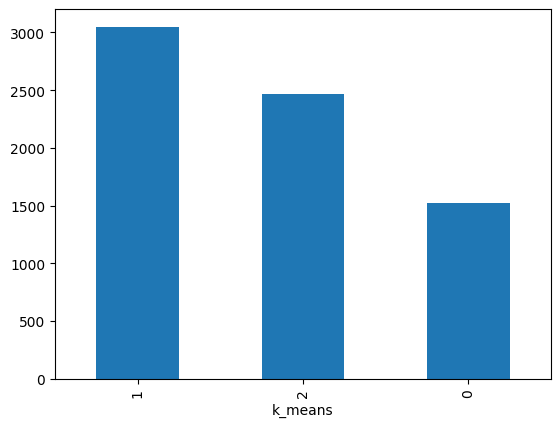

In [43]:
segmented_customers = X['k_means'].value_counts()
segmented_customers.plot(kind='bar')

Summary statistics of group 0:

In [44]:
X[X['k_means'] == 0].describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means,Churn
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.0,1526.000000,...,1526.0,1526.0,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.000000
mean,0.424266,0.028151,0.076295,0.510485,0.034076,0.483617,0.421363,1.0,0.0,0.224115,...,1.0,0.0,0.238532,0.418087,0.292267,0.216907,0.079948,0.485583,0.0,0.074050
std,0.338285,0.021535,0.063977,0.500054,0.181484,0.499895,0.493939,0.0,0.0,0.417135,...,0.0,0.0,0.426326,0.493406,0.454954,0.412274,0.271301,0.499956,0.0,0.261938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.111111,0.014428,0.018173,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.347222,0.018905,0.059783,1.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.732639,0.026368,0.127654,1.000000,0.000000,1.000000,1.000000,1.0,0.0,0.000000,...,1.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,1.000000,0.086070,0.231088,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,...,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


Churn rate of group 0:

<Axes: xlabel='Churn', ylabel='count'>

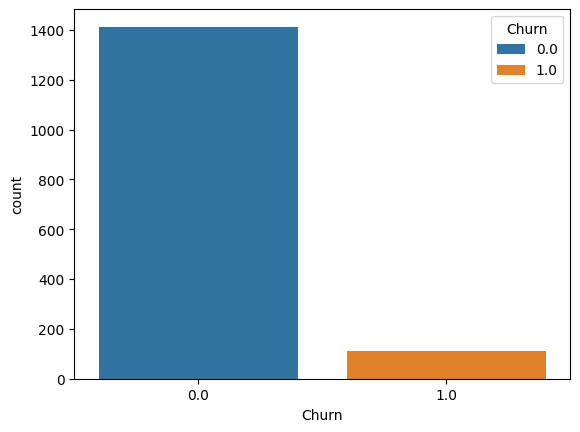

In [45]:
group_0 = X[X['k_means'] == 0]
sns.countplot(x='Churn',data=group_0,hue='Churn')

Summary statistics of group 1:

In [46]:
X[X['k_means'] == 1].describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means,Churn
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,...,3050.0,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.0,3050.000000
mean,0.236066,0.488251,0.132132,0.506230,0.208525,0.287869,0.168852,0.848852,0.151148,0.329180,...,0.0,0.297049,0.094098,0.018033,0.681967,0.126557,0.520000,0.208852,1.0,0.443279
std,0.226168,0.197437,0.133099,0.500043,0.406320,0.452844,0.374683,0.358251,0.358251,0.469993,...,0.0,0.457033,0.292013,0.133092,0.465789,0.332531,0.499682,0.406555,0.0,0.496854
min,0.000000,0.051741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.041667,0.321393,0.024314,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.166667,0.518905,0.088119,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000
75%,0.361111,0.654104,0.203459,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000
max,0.986111,0.863184,0.669871,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Churn rate of group 1:

<Axes: xlabel='Churn', ylabel='count'>

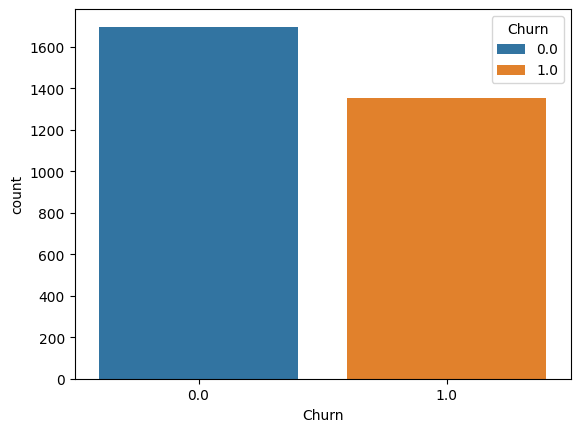

In [47]:
group_1 = X[X['k_means'] == 1]
sns.countplot(x='Churn',data=group_1,hue='Churn')

Summary statistics of group 2:

In [48]:
X[X['k_means'] == 2].describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,k_means,Churn
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,...,2467.0,2467.00000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.0,2467.000000
mean,0.729265,0.700202,0.538848,0.499392,0.184029,0.723956,0.385894,0.910418,0.089582,0.658695,...,0.0,0.74017,0.333198,0.406161,0.666802,0.326307,0.266315,0.094852,2.0,0.163762
std,0.251413,0.182790,0.226338,0.500101,0.387587,0.447129,0.486904,0.285641,0.285641,0.474244,...,0.0,0.43863,0.471452,0.491215,0.471452,0.468956,0.442121,0.293070,0.0,0.370134
min,0.000000,0.170647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000
25%,0.569444,0.566418,0.370486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000
50%,0.791667,0.742786,0.547428,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0,0.000000
75%,0.944444,0.854229,0.711355,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0,1.000000


Churn rate of group 2:

<Axes: xlabel='Churn', ylabel='count'>

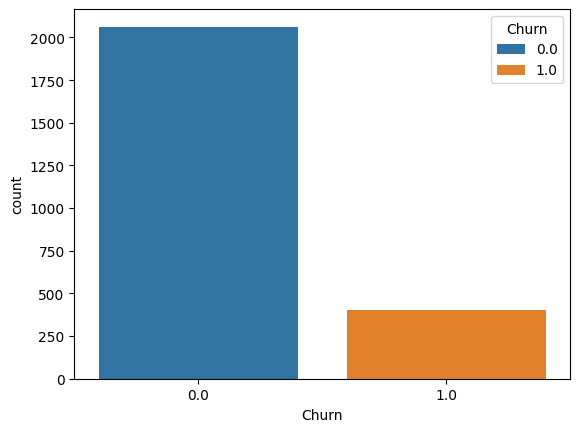

In [49]:
group_2 = X[X['k_means'] == 2]
sns.countplot(x='Churn',data=group_2,hue='Churn')